## Exploratory Data Analysis on Corona Virus 2019 Dataset.

<img src="fusion-medical-animation-EAgGqOiDDMg-unsplash.jpg" width="500" height="500">

All work is on my own. This is an EDA project for my portfolio
Contains a vast number of anonymized patient-related information including pre-conditions. 
The raw dataset consists of 21 different features and 1,048,576 unique patients. 
In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

Updated - 28-01-2023

GOAL - 

1. To perform an EDA.
2. Determine the impact various features.

details of the features in dataset.
- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [1]:
# Importing basic libraries for EDA. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset.
covid = pd.read_csv('Covid Data.csv')

In [3]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
# This is a small function to replace the Nan valeus in the dataset. Sometimes the nan values are in the different form.
def replaceToNan(Dataset,entry):
    for col in Dataset.columns:
        Dataset[col].replace({entry:np.nan}, inplace=True)

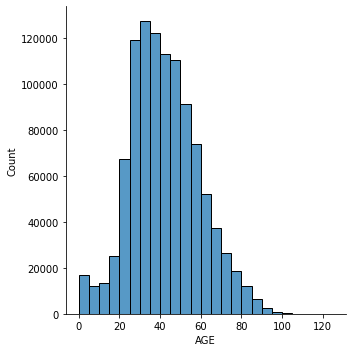

In [6]:
sns.displot(covid, x="AGE", binwidth=5, bins=20)

From the above distribution we can see that the average age of the patient was almost 40 years old.

<AxesSubplot: xlabel='SEX', ylabel='count'>

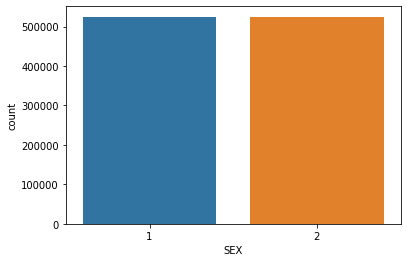

In [7]:
sns.countplot(x='SEX', data=covid)

In [8]:
covid['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In this dataset the label 1 is for FEMALE while the 2 is for MALE. 
The total number of MALE and FEMALE are almost equal. 

In [9]:
covid.groupby(['SEX','ASTHMA']).size().reset_index()

,SEX,ASTHMA,0
0,1,1,19764
1,1,2,504058
2,1,98,1242
3,2,1,11808
4,2,2,509966
5,2,98,1737


So in dataset 1 means "yes" and 2 means "no" except for SEX column. and 98 refers to a missing values.

<AxesSubplot: xlabel='PATIENT_TYPE', ylabel='count'>

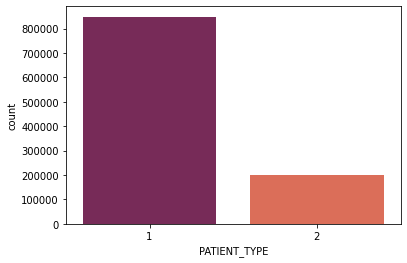

In [10]:
sns.countplot(x='PATIENT_TYPE', data=covid, palette = "rocket")

In [11]:
covid['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [12]:
patient_type_percent = (covid['PATIENT_TYPE'].value_counts()/len(covid['PATIENT_TYPE']))*100
patient_type_percent

1    80.923539
2    19.076461
Name: PATIENT_TYPE, dtype: float64

In PATIENT_TYPE 1 is considered as patient returned home and 2 is considered as hospitalized. We can see that 80
.92 % of the patient retuered home, while only 19% Hospitalized.

<AxesSubplot: xlabel='COPD', ylabel='count'>

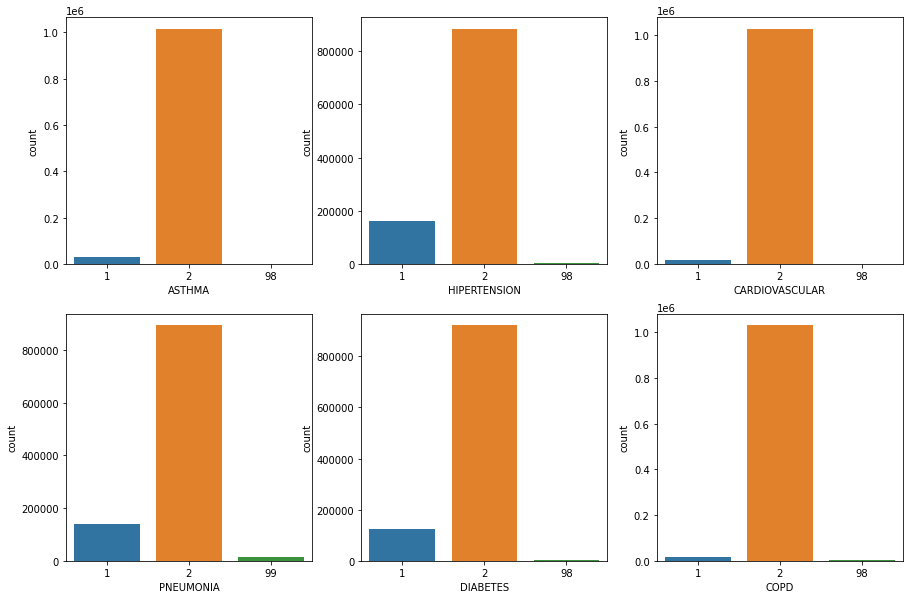

In [13]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = covid, x = 'ASTHMA', ax=ax1)
#plt.ylim(0,1000000)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = covid, x = 'HIPERTENSION', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = covid, x = 'CARDIOVASCULAR', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.countplot(data = covid, x = 'PNEUMONIA', ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.countplot(data = covid, x = 'DIABETES', ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.countplot(data = covid, x = 'COPD', ax=ax6)

<AxesSubplot: xlabel='TOBACCO', ylabel='count'>

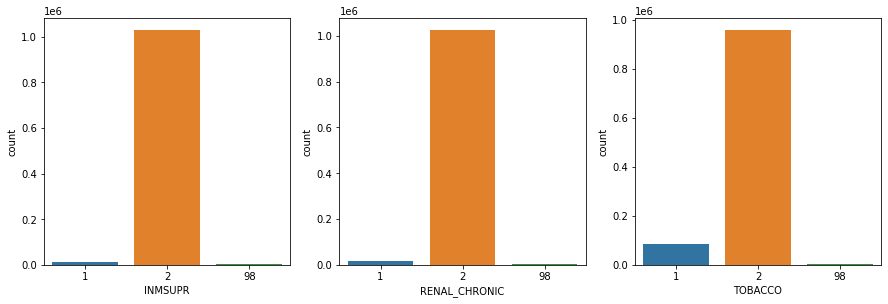

In [14]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = covid, x = 'INMSUPR', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = covid, x = 'RENAL_CHRONIC', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = covid, x = 'TOBACCO', ax=ax3)

Well according to the above plots we can see that most patients don't have any diseases. We can conclude from this that
patients who didn't have any diseases were also effected by Covid19. 

lets create a new column of Date died.
For this what we can do is create a function and create a column of categorical values.

In [15]:
def died_column(row):
    if row == "9999-99-99":
        return 2
    else:
        return 1

In [16]:
covid['DIED'] = covid.DATE_DIED.apply(died_column)

In [17]:
covid.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03-06-2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09-06-2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21-06-2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1


In [18]:
covid.drop("DATE_DIED", axis=1,inplace=True)

In [19]:
covid.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


<AxesSubplot: xlabel='DIED', ylabel='count'>

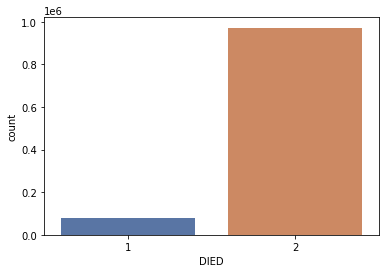

In [20]:
sns.countplot(x='DIED', data=covid, palette = "deep")

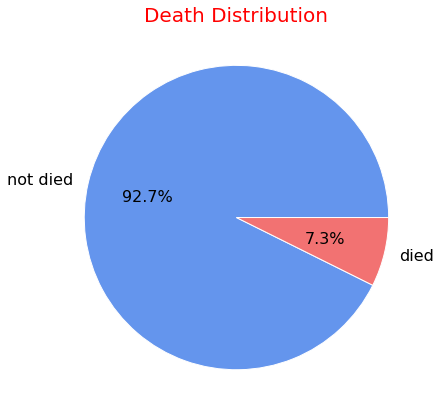

In [21]:
fig, ax = plt.subplots(figsize=(7,7))

ax.pie(covid.DIED.value_counts().values, labels=['not died','died'], autopct='%1.1f%%',startangle=0, 
       textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=['#6495ED', '#F27272']
)
ax.set_title('Death Distribution', fontsize=20, color='red')
plt.show()

We can see that almost 92.7% of the people didn't died due to this disease. 

([<matplotlib.axis.XTick at 0x26a8009c250>,
 [Text(0, 0, 'died'), Text(1, 0, 'not died')])

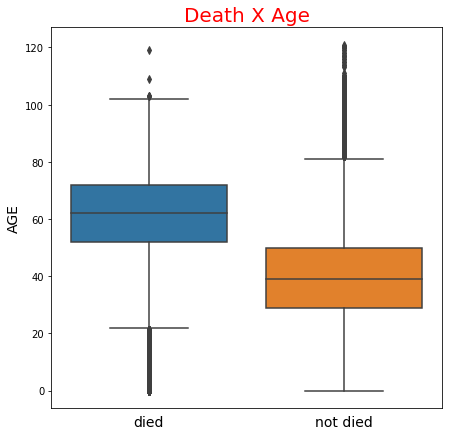

In [22]:
plt.figure(figsize=(7,7))
sns.boxplot(data=covid, x="DIED", y="AGE")
plt.title("Death X Age", color='red', fontsize=20)
plt.xlabel(None)
plt.ylabel('AGE', fontsize=14)
plt.tick_params(bottom = False)
plt.xticks([0,1], ['died','not died'], fontsize=14)

From the above boxplot we can say that, death is more concentrated in older people as thay are more likely to get 
affected by some diseases very quickly. Older age people are more vulnerable to diseases as they have weak immune system. 

([<matplotlib.axis.XTick at 0x26a8012e760>,
 [Text(0, 0, 'consumes'), Text(1, 0, 'not consumes'), Text(2, 0, 'missing')])

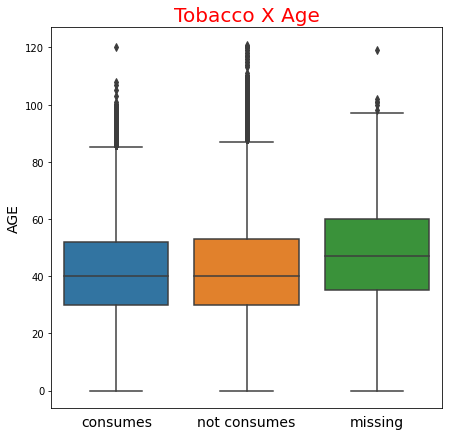

In [23]:
plt.figure(figsize=(7,7))
sns.boxplot(data=covid, x="TOBACCO", y="AGE")
plt.title("Tobacco X Age", color='red', fontsize=20)
plt.xlabel(None)
plt.ylabel('AGE', fontsize=14)
plt.tick_params(bottom = False)
plt.xticks([0,1,2], ['consumes','not consumes','missing'], fontsize=14)

We from the above plot we can say that the most of the tobacco consumers are in the age, let's say between 30 to 50.
The median age of the tobacco consumer is almost 40 years old. The feature Tobacco consumption is really important as 
it dictates their overall lung health. It plays really important role in how good are the lungs of a particular person. 
Also Covid19 is also associated with the lungs overall health. 

In the EDA we came to understand that there are null values in some features, We will do some Data Preprocessing to clean 
this data filter out the null values

In [24]:
# checking the null values- 
for col in covid.columns:
    print(col)
    print(covid.loc[covid[col] == 97, col].count())
    print(covid.loc[covid[col] == 98, col].count())
    print(covid.loc[covid[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

INTUBED
848544
0
7325

PNEUMONIA
0
0
16003

AGE
135
124
86

PREGNANT
523511
3754
0

DIABETES
0
3338
0

COPD
0
3003
0

ASTHMA
0
2979
0

INMSUPR
0
3404
0

HIPERTENSION
0
3104
0

OTHER_DISEASE
0
5045
0

CARDIOVASCULAR
0
3076
0

OBESITY
0
3032
0

RENAL_CHRONIC
0
3006
0

TOBACCO
0
3220
0

CLASIFFICATION_FINAL
0
0
0

ICU
848544
0
7488

DIED
0
0
0



In [25]:
covid.groupby(['PREGNANT','SEX'])['SEX'].count()

PREGNANT  SEX
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: SEX, dtype: int64

we can see that most of the missing values are having a gender MALE, so what we can do is to impute those values.

In [26]:
covid.PREGNANT = covid.PREGNANT.replace(97,2)

In [27]:
covid.PREGNANT.value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

We can see that there are some null values in every feature, what we will be doing is, removing those null columns as 
they are relatively small as compared to size of Dataset.

In [28]:
covid.drop(covid.index[covid.PNEUMONIA == 99], axis=0, inplace=True)
covid.drop(covid.index[covid.PREGNANT == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.DIABETES == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.COPD == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.ASTHMA == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.INMSUPR == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.OTHER_DISEASE == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.CARDIOVASCULAR == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.OBESITY == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.RENAL_CHRONIC == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.TOBACCO == 98], axis=0, inplace=True)

In [29]:
covid.drop(covid.index[covid.HIPERTENSION == 98], axis=0, inplace=True)

We can also remove AGE null value rows as they are also relatively low with the dataset. 

In [30]:
covid.drop(covid.index[covid.AGE == 97], axis=0, inplace=True)
covid.drop(covid.index[covid.AGE == 98], axis=0, inplace=True)
covid.drop(covid.index[covid.AGE == 99], axis=0, inplace=True)

Lets see the missing value again. 

In [31]:
for col in covid.columns:
    print(col)
    print(covid.loc[covid[col] == 97, col].count())
    print(covid.loc[covid[col] == 98, col].count())
    print(covid.loc[covid[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

INTUBED
830233
0
2152

PNEUMONIA
0
0
0

AGE
0
0
0

PREGNANT
0
0
0

DIABETES
0
0
0

COPD
0
0
0

ASTHMA
0
0
0

INMSUPR
0
0
0

HIPERTENSION
0
0
0

OTHER_DISEASE
0
0
0

CARDIOVASCULAR
0
0
0

OBESITY
0
0
0

RENAL_CHRONIC
0
0
0

TOBACCO
0
0
0

CLASIFFICATION_FINAL
0
0
0

ICU
830233
0
2308

DIED
0
0
0



Most of the missing values have been dealt with. Now only 2 features are left which are INTUBED and ICU. We can check
how important these 2 features are. Though they have large number of null values. INTUBED and ICU might be important for 
our problem statement, because since the patients who are in the ICU are on high risk of this disease.

In [32]:
covid['INTUBED'].value_counts()

97    830233
2     156300
1      32970
99      2152
Name: INTUBED, dtype: int64

In [33]:
covid['ICU'].value_counts()

97    830233
2     172717
1      16397
99      2308
Name: ICU, dtype: int64

What we can do is replace the values with most occuring values i.e. Mode values.

In [34]:
covid.INTUBED = covid.INTUBED.replace(97,2)

In [35]:
covid.INTUBED = covid.INTUBED.replace(99,2)

In [36]:
covid.ICU = covid.ICU.replace(97,2)

In [37]:
covid.ICU = covid.ICU.replace(99,2)

In [38]:
for col in covid.columns:
    print(col)
    print(covid.loc[covid[col] == 97, col].count())
    print(covid.loc[covid[col] == 98, col].count())
    print(covid.loc[covid[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

INTUBED
0
0
0

PNEUMONIA
0
0
0

AGE
0
0
0

PREGNANT
0
0
0

DIABETES
0
0
0

COPD
0
0
0

ASTHMA
0
0
0

INMSUPR
0
0
0

HIPERTENSION
0
0
0

OTHER_DISEASE
0
0
0

CARDIOVASCULAR
0
0
0

OBESITY
0
0
0

RENAL_CHRONIC
0
0
0

TOBACCO
0
0
0

CLASIFFICATION_FINAL
0
0
0

ICU
0
0
0

DIED
0
0
0



# Thank You